In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
sns.set() #setting the default seaborn style for our plots

In [3]:
# Read the Dataset
df = pd.read_csv("supermarket_sales - Sheet1.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

## No nulls so we can start analyzing the data

In [5]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


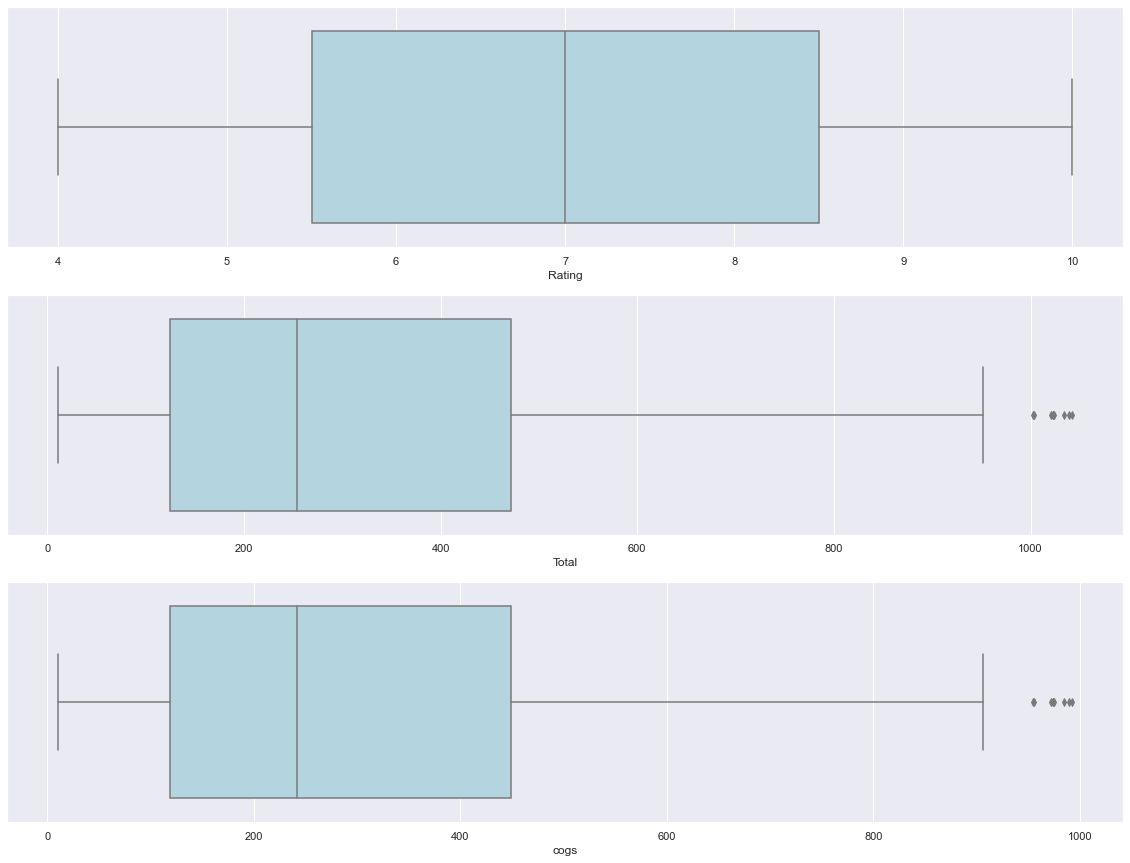

In [6]:
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x=df.Rating, color='lightblue')
plt.subplot(3,1,2)
sns.boxplot(x=df.Total, color='lightblue')
plt.subplot(3,1,3)
sns.boxplot(x=df.cogs, color='lightblue')
plt.show()

## very few outliers (will not impact our analysis)

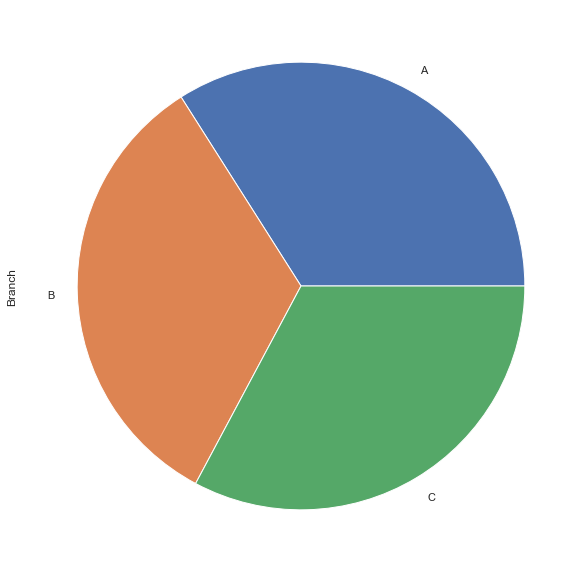

In [7]:
plt.figure(figsize= (50,35))
plt.subplot(3,1,1)
df['Branch'].value_counts().plot(kind='pie')
plt.show()

In [8]:
df['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

## almost equal numbers Branches

In [9]:
df['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

## Branches are the same as City(A=Yangon, B=Mandalay, C=Naypyitaw)

In [10]:
#Checking
df[df['Branch']=='A'].City.value_counts()

Yangon    340
Name: City, dtype: int64

In [11]:
#Checking
df[df['Branch']=='B'].City.value_counts()

Mandalay    332
Name: City, dtype: int64

In [12]:
#Checking
df[df['Branch']=='C'].City.value_counts()

Naypyitaw    328
Name: City, dtype: int64

In [13]:
df[df['Branch']=='A']['Rating'].mean()

7.027058823529413

/Users/ahmedelselmy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Branch', ylabel='Rating'>

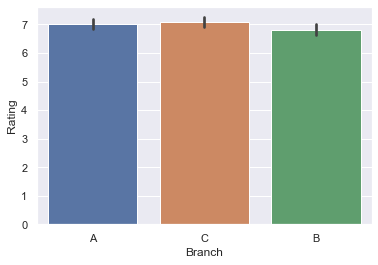

In [14]:
sns.barplot('Branch','Rating',data=df)

## The difference between the ratings of the items between the 3 branches are very small, which means that the branch doesn't have that much of an impact on the rating of the items

In [15]:
df2=df[['gross income','Rating']][:100]

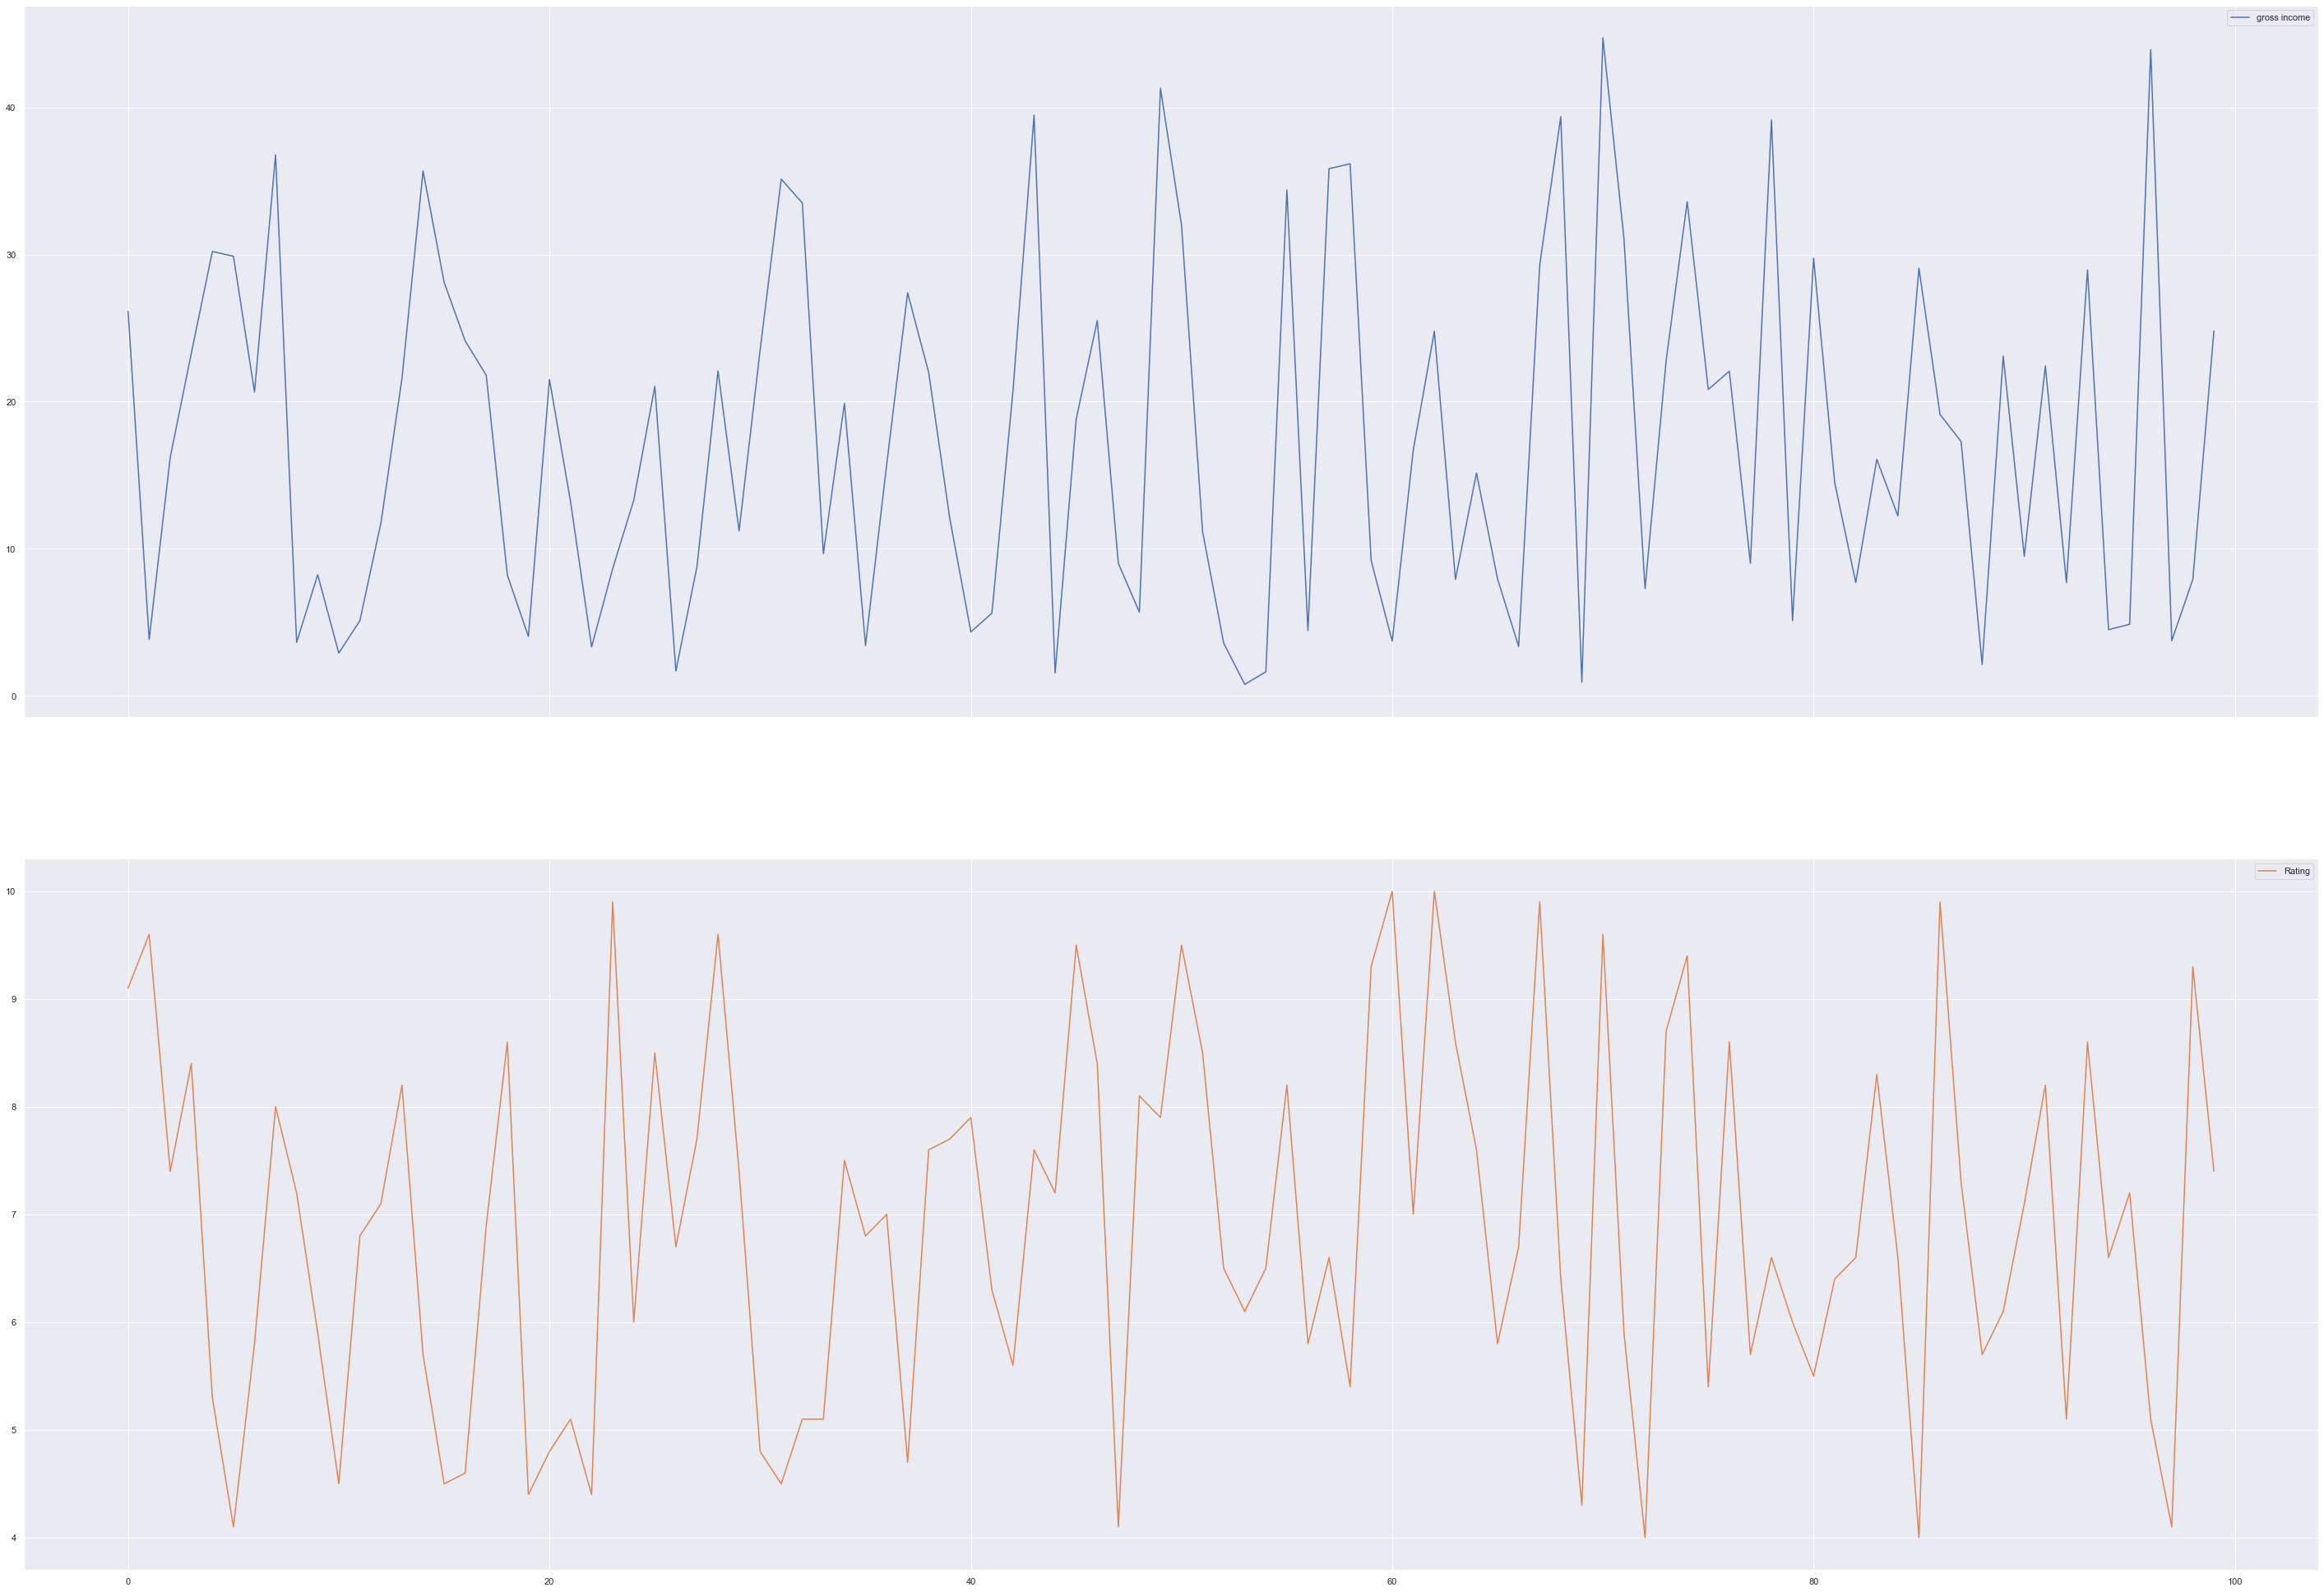

In [16]:
axes = df2.plot.line(subplots=True,figsize= (50,35))

## it looks like the gross income and the ratings depend on each other

In [18]:
df['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [19]:
df['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [28]:
df[df['Product line']=='Fashion accessories']['Rating'].mean()

7.029213483146067

In [31]:
df[df['Product line']=='Electronic accessories']['Rating'].mean()

6.92470588235294

In [29]:
df[df['Product line']=='Food and beverages']['Rating'].mean()

7.113218390804598

In [32]:
df[df['Product line']=='Sports and travel']['Rating'].mean()

6.916265060240964

In [33]:
df[df['Product line']=='Home and lifestyle']['Rating'].mean()

6.8375

In [34]:
df[df['Product line']=='Health and beauty']['Rating'].mean()

7.003289473684212

## very slight difference between the ratings of each product line, which means that product lines does not have that much of an impact on the customer ratings

In [39]:
df[df['Rating']<5]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
10,351-62-0822,B,Mandalay,Member,Female,Fashion accessories,14.48,4,2.8960,60.8160,2/6/2019,18:07,Ewallet,57.92,4.761905,2.8960,4.5
15,299-46-1805,B,Mandalay,Member,Female,Sports and travel,93.72,6,28.1160,590.4360,1/15/2019,16:19,Cash,562.32,4.761905,28.1160,4.5
16,656-95-9349,A,Yangon,Member,Female,Health and beauty,68.93,7,24.1255,506.6355,3/11/2019,11:03,Credit card,482.51,4.761905,24.1255,4.6
19,319-50-3348,B,Mandalay,Normal,Female,Home and lifestyle,40.30,2,4.0300,84.6300,3/11/2019,15:30,Ewallet,80.60,4.761905,4.0300,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,764-44-8999,B,Mandalay,Normal,Female,Health and beauty,14.76,2,1.4760,30.9960,2/18/2019,14:42,Ewallet,29.52,4.761905,1.4760,4.3
988,267-62-7380,C,Naypyitaw,Member,Male,Electronic accessories,82.34,10,41.1700,864.5700,3/29/2019,19:12,Ewallet,823.40,4.761905,41.1700,4.3
990,886-18-2897,A,Yangon,Normal,Female,Food and beverages,56.56,5,14.1400,296.9400,3/22/2019,19:06,Credit card,282.80,4.761905,14.1400,4.5
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4


In [40]:
df[df['Rating']<5]['Branch'].value_counts()

B    59
A    52
C    42
Name: Branch, dtype: int64

## Branch B has the most of under 5 rated items while branch C has the least

In [46]:
df[df['Rating']<5]['Customer type'].value_counts()

Member    85
Normal    68
Name: Customer type, dtype: int64

## member customers tend to rate less than the normal customers

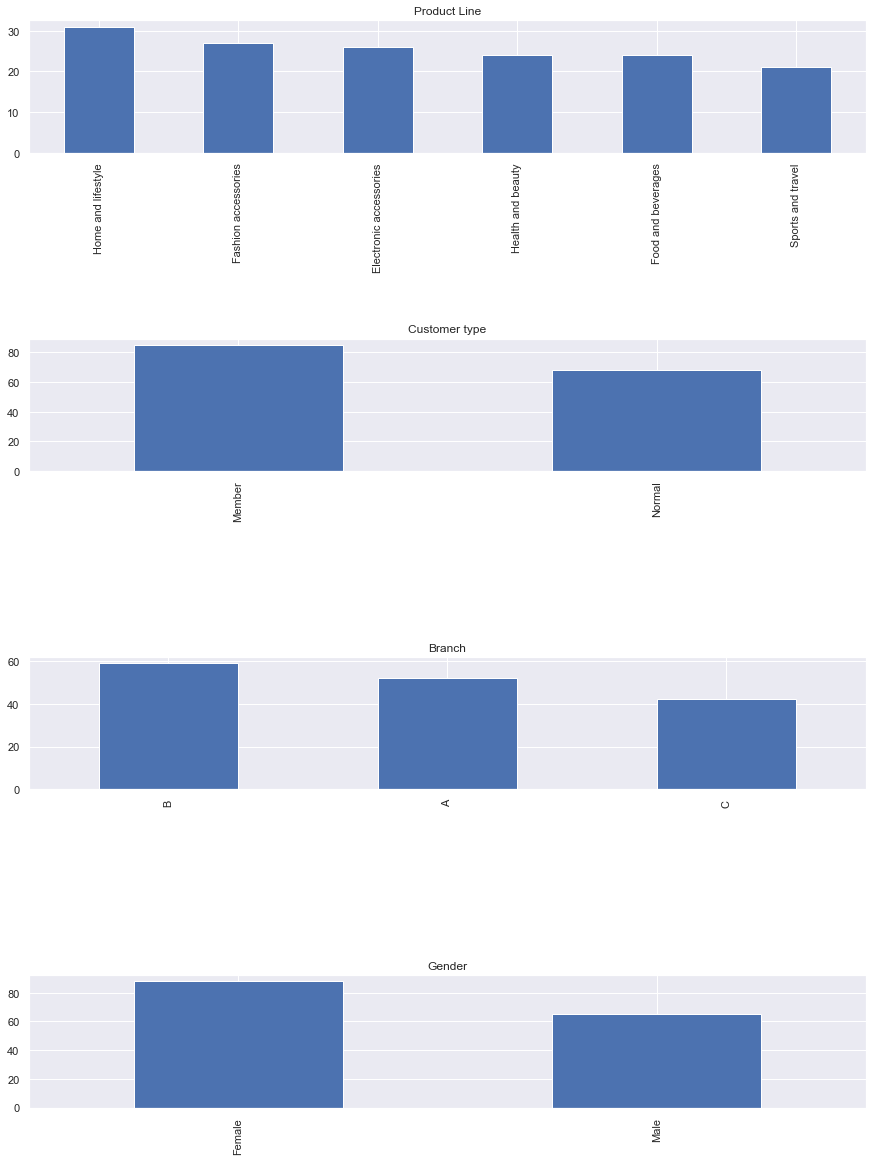

In [62]:
plt.figure(figsize= (15,20))
plt.subplot(7,1,1)
df[df['Rating']<5]['Product line'].value_counts().plot(kind='bar')
plt.title("Product Line")
plt.subplot(7,1,3)
df[df['Rating']<5]['Customer type'].value_counts().plot(kind='bar')
plt.title("Customer type")
plt.subplot(7,1,5)
df[df['Rating']<5]['Branch'].value_counts().plot(kind='bar')
plt.title("Branch")
plt.subplot(7,1,7)
df[df['Rating']<5]['Gender'].value_counts().plot(kind='bar')
plt.title("Gender")
plt.show()

## Females tend to give less ratings than men do